        AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST   GB  SIM_GIPERT  \
0  1.347079  1.0       2.0        1.0        1.0       2.0  3.0         0.0   
1 -0.610641  1.0       1.0        0.0        0.0       0.0  0.0         0.0   
2 -0.877603  1.0       0.0        0.0        0.0       2.0  2.0         0.0   
3  0.546194  0.0       0.0        0.0        0.0       2.0  2.0         0.0   
4 -0.165705  1.0       0.0        0.0        0.0       2.0  3.0         0.0   

   DLIT_AG  ZSN_A  ...  NOT_NA_1_n  NOT_NA_2_n  NOT_NA_3_n  LID_S_n  \
0      7.0    0.0  ...         0.0         0.0         0.0      1.0   
1      0.0    0.0  ...         1.0         0.0         0.0      1.0   
2      2.0    0.0  ...         3.0         2.0         2.0      1.0   
3      3.0    1.0  ...         0.0         0.0         0.0      0.0   
4      7.0    0.0  ...         0.0         0.0         0.0      0.0   

   B_BLOK_S_n  ANT_CA_S_n  GEPAR_S_n  ASP_S_n  TIKL_S_n  TRENT_S_n  
0         0.0         0.0    

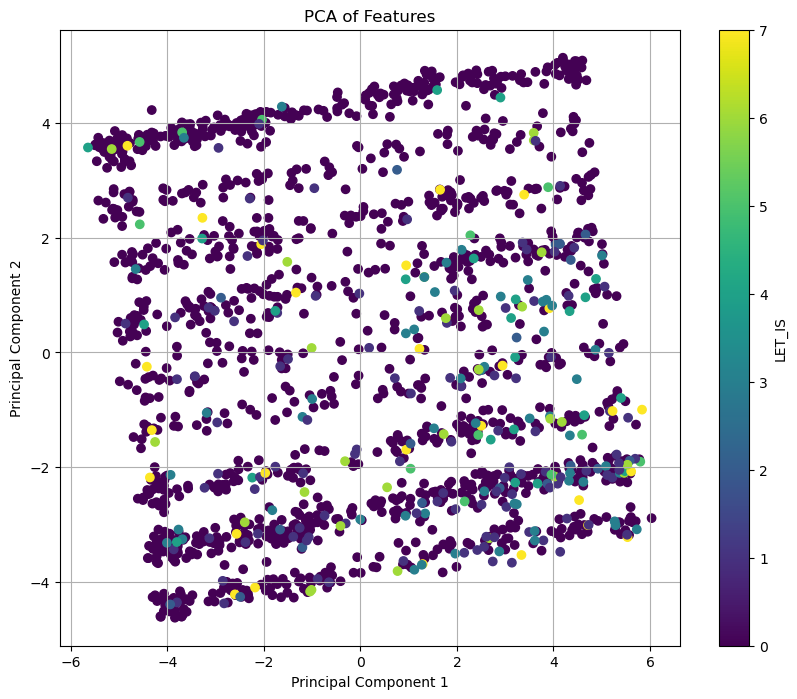

In [45]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the datasets
features_path = 'features_reduced_imputed.csv'
target_path = 'target.csv'

features_df = pd.read_csv(features_path)
target_df = pd.read_csv(target_path)

# Dropping the index column from both dataframes
features_df.drop(columns=['Unnamed: 0'], inplace=True)
target_df.drop(columns=['Unnamed: 0'], inplace=True)

li = ['AGE', 'K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD', 'ROE'] #나머지 continues variable은 상관관계에서 drop된걸로 보임

for column in li: 
    series = features_df[column]
    # Series 객체를 numpy 배열로 변환
    array = series.values
    # 1D 배열을 2D 배열로 변환
    array_reshaped = array.reshape(-1, 1)
    # StandardScaler를 사용하여 정규화 수행
    scaler = StandardScaler()
    normalized_array = scaler.fit_transform(array_reshaped)
    # 정규화된 데이터를 다시 1D 배열로 변환
    normalized_array_1d = normalized_array.flatten()
    # 결과를 데이터프레임에 다시 할당
    features_df[column] = normalized_array_1d

print(features_df.head(5))

# Performing PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_df)

# Creating a DataFrame with the principal components and target variable
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df = pd.concat([pca_df, target_df], axis=1)

# Plotting the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['LET_IS'], cmap='viridis')
plt.colorbar(scatter, label='LET_IS')
plt.title('PCA of Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


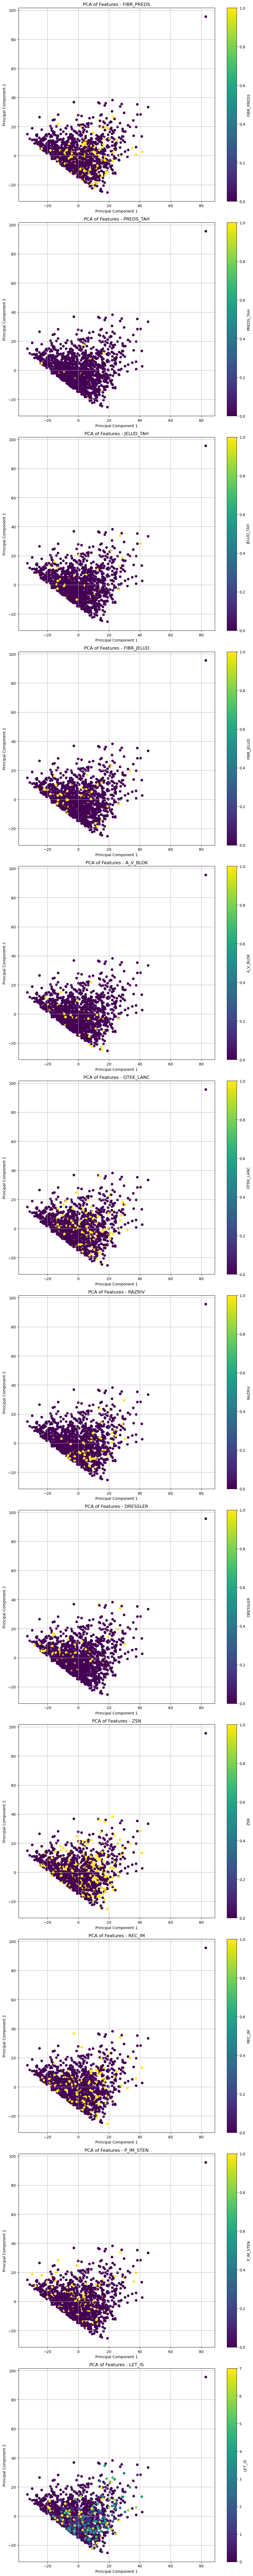

In [46]:
# Function to plot PCA results with all target variables in one figure
def plot_pca_results_combined(features_path, target_path):
    # Load the datasets
    features_df = pd.read_csv(features_path)
    target_df = pd.read_csv(target_path)

    # Dropping the index column from both dataframes
    features_df.drop(columns=['Unnamed: 0'], inplace=True)
    target_df.drop(columns=['Unnamed: 0'], inplace=True)

    # Performing PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(features_df)

    # Creating a DataFrame with the principal components and target variable
    pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
    pca_df = pd.concat([pca_df, target_df], axis=1)

    # Plotting the results for each target variable in one figure
    target_columns = target_df.columns
    num_targets = len(target_columns)
    fig, axes = plt.subplots(nrows=num_targets, ncols=1, figsize=(10, 8 * num_targets))

    for i, target in enumerate(target_columns):
        ax = axes[i] if num_targets > 1 else axes
        scatter = ax.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df[target], cmap='viridis')
        ax.set_title(f'PCA of Features - {target}')
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.grid(True)
        fig.colorbar(scatter, ax=ax, label=target)

    plt.tight_layout()
    plt.show()

# Plotting the PCA results for all target variables in one figure
plot_pca_results_combined(features_path, target_path)


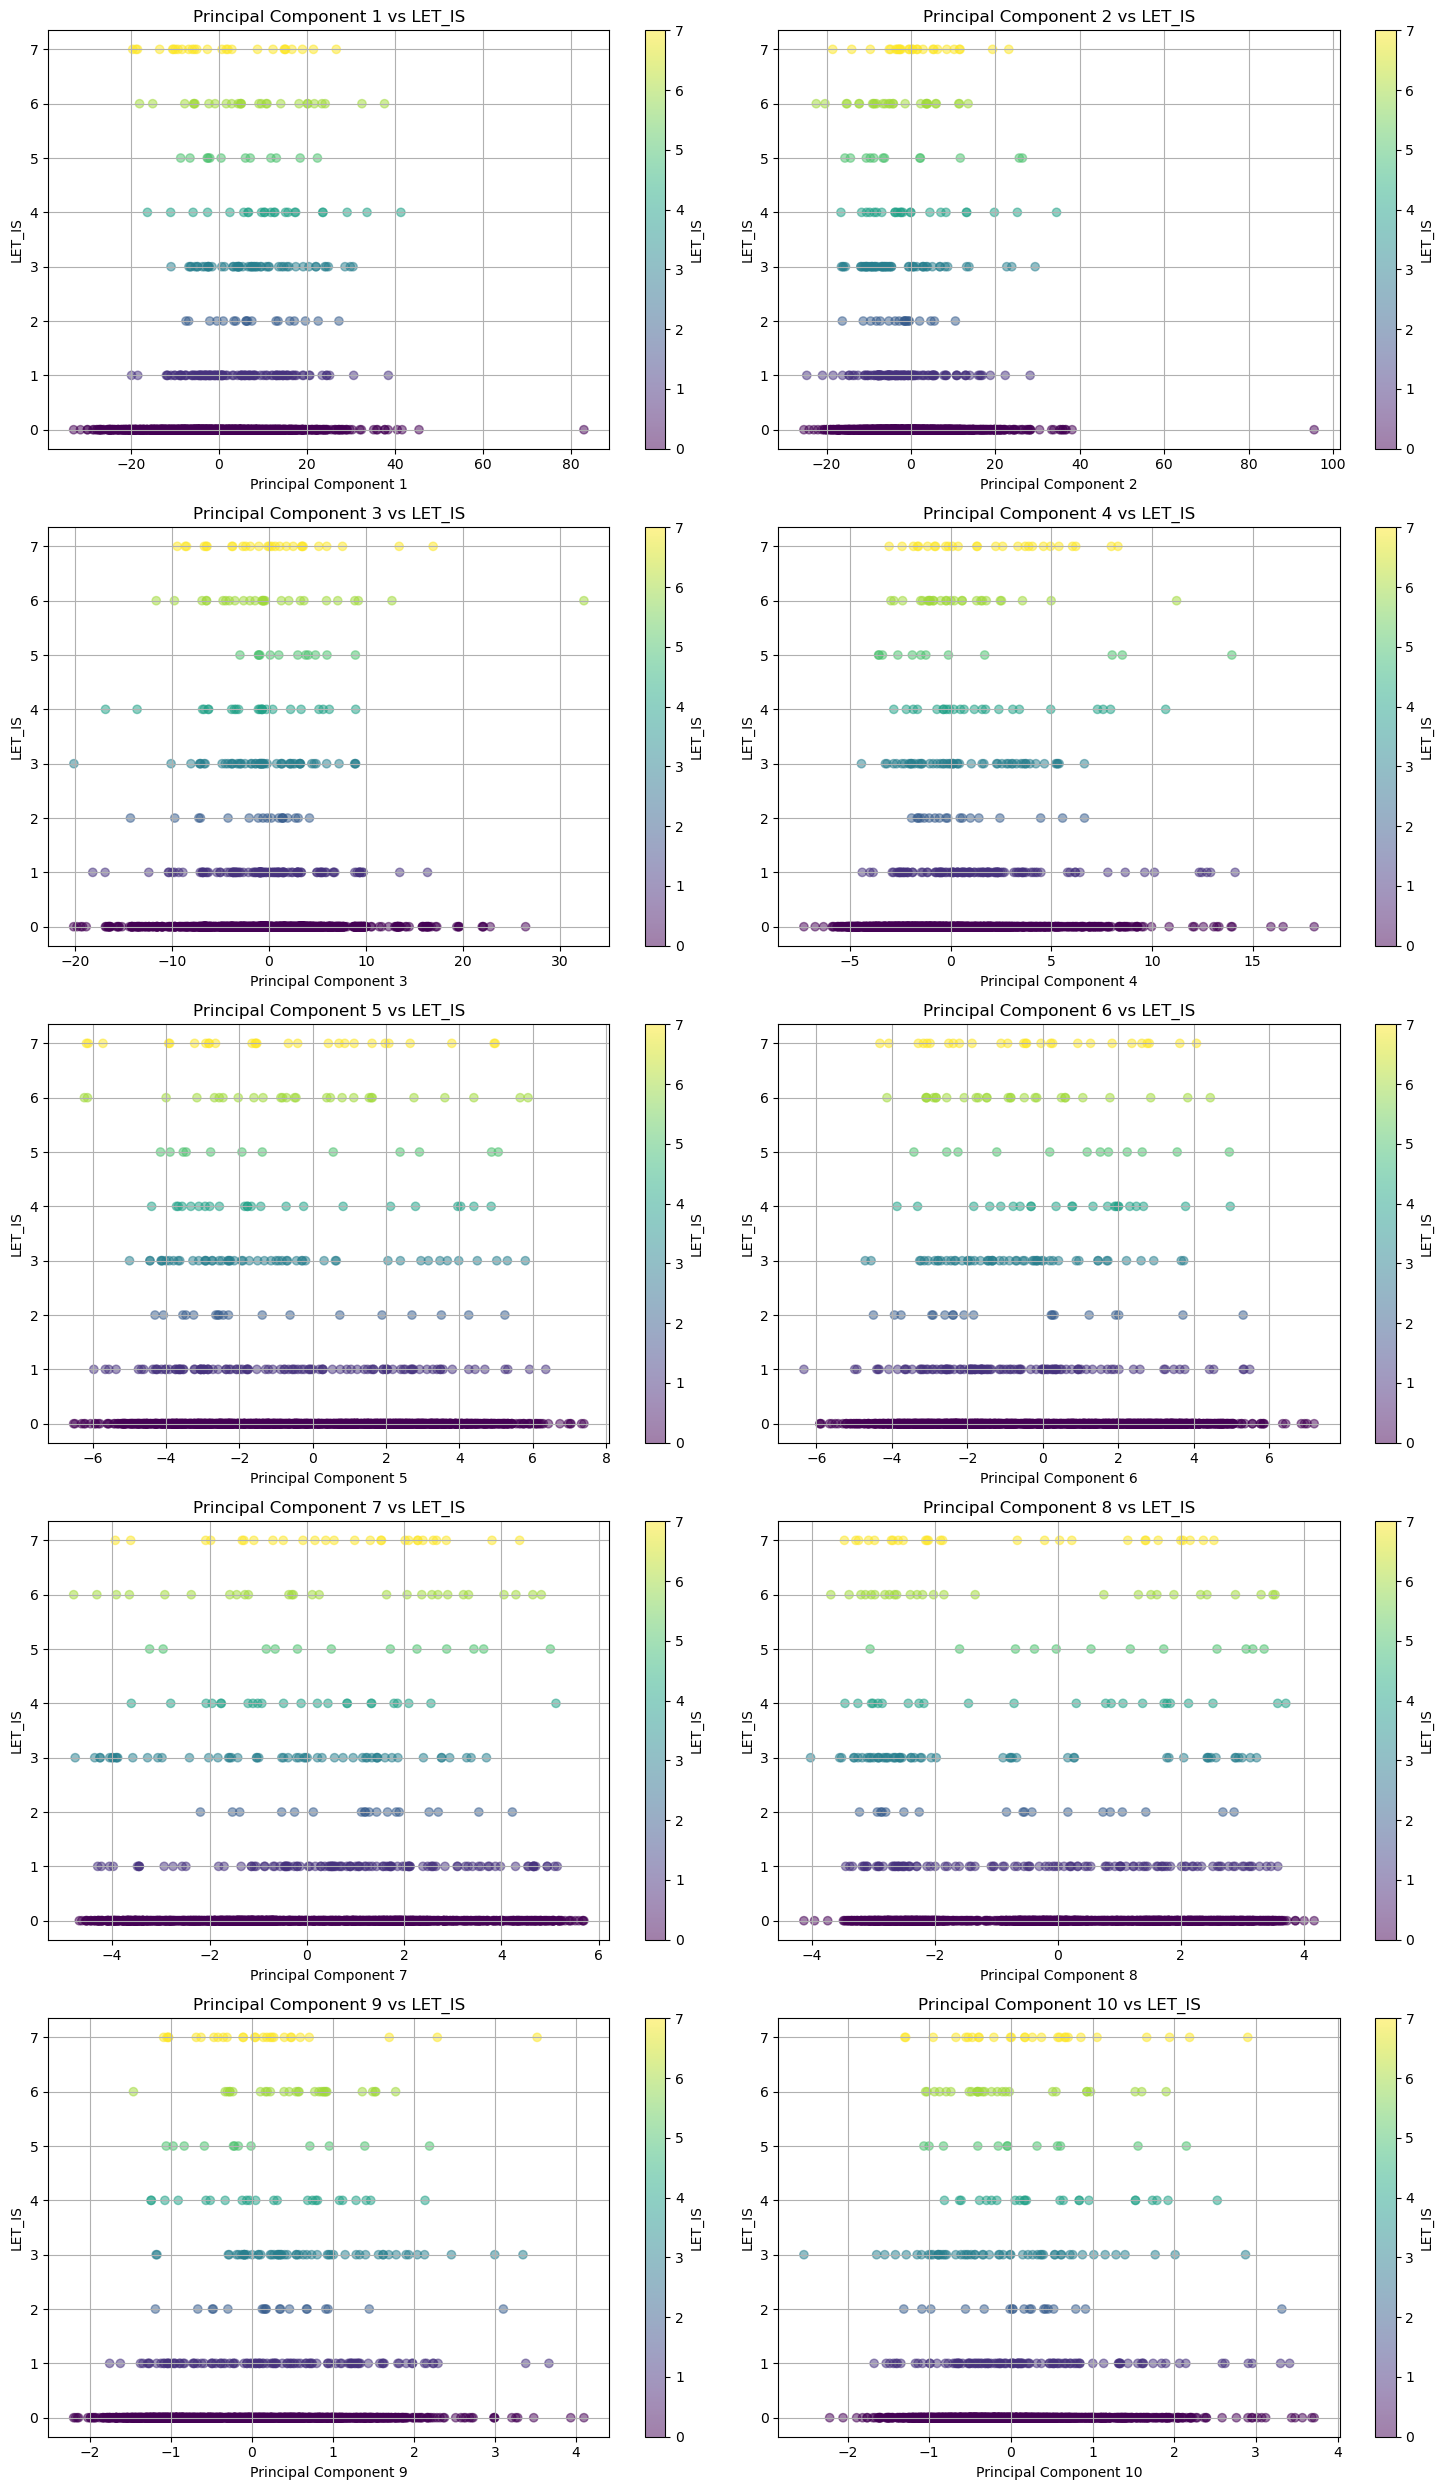

In [47]:
# Function to plot all principal components with respect to LET_IS with transparency
def plot_all_pca_components_transparent(features_path, target_path, n_components=10):
    # Load the datasets
    features_df = pd.read_csv(features_path)
    target_df = pd.read_csv(target_path)

    # Dropping the index column from both dataframes
    features_df.drop(columns=['Unnamed: 0'], inplace=True)
    target_df.drop(columns=['Unnamed: 0'], inplace=True)

    # Performing PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(features_df)

    # Creating a DataFrame with the principal components and target variable
    pca_df = pd.DataFrame(data=principal_components, columns=[f'Principal Component {i+1}' for i in range(n_components)])
    pca_df = pd.concat([pca_df, target_df[['LET_IS']]], axis=1)

    # Plotting the results for all principal components with respect to LET_IS
    fig, axes = plt.subplots(nrows=n_components//2, ncols=2, figsize=(15, 5 * (n_components//2)))
    axes = axes.flatten()

    for i in range(n_components):
        ax = axes[i]
        scatter = ax.scatter(pca_df[f'Principal Component {i+1}'], pca_df['LET_IS'], c=pca_df['LET_IS'], cmap='viridis', alpha=0.5)
        ax.set_title(f'Principal Component {i+1} vs LET_IS')
        ax.set_xlabel(f'Principal Component {i+1}')
        ax.set_ylabel('LET_IS')
        ax.grid(True)
        fig.colorbar(scatter, ax=ax, label='LET_IS')

    plt.tight_layout()
    plt.show()

# Plotting the PCA results for all principal components with respect to LET_IS with transparency
plot_all_pca_components_transparent(features_path, target_path, n_components=10)


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Extracting features and target variable
X = features_df.values
y = target_df['LET_IS'].values

# Initializing the RandomForestClassifier with OOB score enabled
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X, y)

# OOB score
oob_score = rf.oob_score_

# Feature importance
feature_importances = rf.feature_importances_

# Sorting feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_idx]
sorted_features = features_df.columns[sorted_idx]

# Displaying results
oob_score, sorted_features[:10], sorted_importances[:10]


(0.8605882352941177,
 Index(['K_SH_POST', 'AGE', 'L_BLOOD', 'ROE', 'AST_BLOOD', 'K_BLOOD', 'ZSN_A',
        'NA_BLOOD', 'TIME_B_S', 'R_AB_3_n'],
       dtype='object'),
 array([0.06427522, 0.04570742, 0.04173216, 0.0392525 , 0.0352017 ,
        0.03485919, 0.03348765, 0.03283494, 0.03120841, 0.03053632]))

In [49]:
# Splitting the data into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the RandomForest model on the training set
rf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf.predict(X_test)

# Generating the classification report without output_dict
classification_report_str = classification_report(y_test, y_pred)

# OOB score and feature importances
oob_score_70_30 = rf.oob_score_
feature_importances_70_30 = rf.feature_importances_

# Sorting feature importances in descending order
sorted_idx_70_30 = np.argsort(feature_importances_70_30)[::-1]
sorted_importances_70_30 = feature_importances_70_30[sorted_idx_70_30]
sorted_features_70_30 = features_df.columns[sorted_idx_70_30]

# Displaying results
oob_score_70_30, sorted_features_70_30[:10], sorted_importances_70_30[:10]


C:\Users\J\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\J\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\J\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8647058823529412,
 Index(['K_SH_POST', 'AGE', 'ROE', 'L_BLOOD', 'NA_BLOOD', 'AST_BLOOD',
        'K_BLOOD', 'R_AB_3_n', 'ALT_BLOOD', 'ZSN_A'],
       dtype='object'),
 array([0.06295979, 0.04629768, 0.04253182, 0.04199727, 0.03396259,
        0.03320683, 0.03257663, 0.03163755, 0.03076235, 0.03068039]))

In [50]:
# Calculating the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

# Displaying the test accuracy
test_accuracy, oob_score


(0.8588235294117647, 0.8605882352941177)

In [51]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Performing PCA to reduce dimensionality
pca = PCA(n_components=10)
X_pca = pca.fit_transform(features_df)

# Splitting the data into training and testing sets with a 70:30 ratio
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Initializing and training the RandomForest model on the PCA-transformed training set
rf_pca = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_pca.fit(X_train_pca, y_train_pca)

# Making predictions on the PCA-transformed test set
y_pred_pca = rf_pca.predict(X_test_pca)

# Calculating the accuracy on the PCA-transformed test set
test_accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
oob_score_pca = rf_pca.oob_score_

# pca를 통해서, 차원축소를 진행한 이후 -> 테스트 데이터셋을 통한 정확도 비교
test_accuracy_pca, oob_score_pca


(0.8352941176470589, 0.8411764705882353)

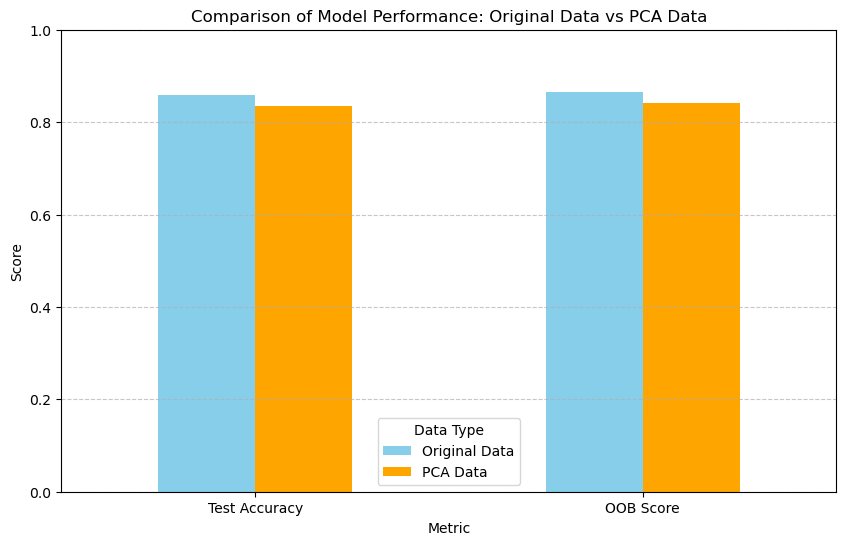

In [52]:
import matplotlib.pyplot as plt

# Values for comparison
test_accuracy_original = 0.8588
oob_score_original = 0.8647
test_accuracy_pca = 0.8353
oob_score_pca = 0.8420

# Creating a dataframe for visualization
comparison_df = pd.DataFrame({
    'Metric': ['Test Accuracy', 'OOB Score'],
    'Original Data': [test_accuracy_original, oob_score_original],
    'PCA Data': [test_accuracy_pca, oob_score_pca]
})

# Plotting the comparison
comparison_df.set_index('Metric').plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Comparison of Model Performance: Original Data vs PCA Data')
plt.ylabel('Score')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=0)
plt.legend(title='Data Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [53]:
!pip install xgboost

In [ ]:
# 추가적으로 5가지 모델을 적용하고, 정확도 비교

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Binarizing the target variable
y_binary = (y > 0).astype(int)

# Splitting the data into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Initializing models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(random_state=42)
}

# Dictionary to store the accuracies
accuracies = {}

# Training and evaluating each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)

# Performing PCA and splitting the PCA-transformed data
pca = PCA(n_components=10)
X_pca = pca.fit_transform(features_df)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_binary, test_size=0.3, random_state=42)

# Dictionary to store the accuracies for PCA data
accuracies_pca = {}

# Training and evaluating each model on PCA data
for name, model in models.items():
    model.fit(X_train_pca, y_train_pca)
    y_pred_pca = model.predict(X_test_pca)
    accuracies_pca[name] = accuracy_score(y_test_pca, y_pred_pca)

# Creating a dataframe for visualization
comparison_df1 = pd.DataFrame({
    'Metric': accuracies.keys(),
    'Original Data': accuracies.values(),
    'PCA Data': accuracies_pca.values()
})

# Plotting the comparison
comparison_df1.set_index('Metric').plot(kind='bar', figsize=(12, 6), color=['skyblue', 'orange'])
plt.title('Model Performance Comparison: Original Data vs PCA Data')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=0)
plt.legend(title='Data Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

comparison_df1

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Binarizing the target variable
y_binary = (y > 0).astype(int)

# Splitting the data into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Initializing models
new_models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'LDA': LinearDiscriminantAnalysis()
}

# Dictionary to store the accuracies
new_accuracies = {}

# Training and evaluating each model
for name, model in new_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    new_accuracies[name] = accuracy_score(y_test, y_pred)

# Performing PCA and splitting the PCA-transformed data
pca = PCA(n_components=10)
X_pca = pca.fit_transform(features_df)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_binary, test_size=0.3, random_state=42)

# Dictionary to store the accuracies for PCA data
new_accuracies_pca = {}

# Training and evaluating each model on PCA data
for name, model in new_models.items():
    model.fit(X_train_pca, y_train_pca)
    y_pred_pca = model.predict(X_test_pca)
    new_accuracies_pca[name] = accuracy_score(y_test_pca, y_pred_pca)

# Creating a dataframe for visualization
comparison_df2 = pd.DataFrame({
    'Metric': new_accuracies.keys(),
    'Original Data': new_accuracies.values(),
    'PCA Data': new_accuracies_pca.values()
})

# Plotting the comparison
comparison_df2.set_index('Metric').plot(kind='bar', figsize=(12, 6), color=['skyblue', 'orange'])
plt.title('New Model Performance Comparison: Original Data vs PCA Data')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=0)
plt.legend(title='Data Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Displaying the accuracies
comparison_df2
